In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cap_df = pd.read_csv('top_cap.csv')
cap_df

,symbol,name,cap
0,BTCUSDT,Bitcoin,2161753983734
1,ETHUSDT,Ethereum,320295874606
2,USDTUSDT,Tether,155519706251
3,XRPUSDT,XRP,135839785268
4,BNBUSDT,BNB,96049768518
...,...,...,...
95,USDCUSDT,Binance Bridged USDC (BNB Smart Chain),999076348
96,METHUSDT,Mantle Staked Ether,991645352
97,XDCUSDT,XDC Network,975537662
98,ABUSDT,AB,972521767


In [3]:
df = pd.read_csv('data.csv')
df = df[['close','symbol']]

rer = pd.DataFrame()
for i in df.symbol.unique():
    rer[f'{i}'] = df[df['symbol'] == f'{i}'].reset_index().drop(columns=['index','symbol']).rename(columns={'close':f'{i}'})

df = rer.dropna(axis=1, how='any')

In [4]:
df

,BTCUSDT,ETHUSDT,BNBUSDT,LTCUSDT,ADAUSDT,XRPUSDT,XLMUSDT,TRXUSDT,ETCUSDT,VETUSDT,...,SHIBUSDT,ICPUSDT,QNTUSDT,NEXOUSDT,OPUSDT,APTUSDT,ARBUSDT,WBTCUSDT,SUIUSDT,PEPEUSDT
0,26339.97,1720.95,244.10,77.19,0.2610,0.4868,0.0795,0.07016,15.23,0.01486,...,0.000007,3.960,100.70,0.606,1.100,6.7300,0.9943,26500.41,0.7207,9.400000e-07
1,26844.35,1737.11,243.10,77.48,0.2634,0.4936,0.0800,0.06999,15.39,0.01516,...,0.000007,3.955,99.80,0.608,1.133,6.9392,1.0073,26733.78,0.7851,9.400000e-07
2,28307.99,1791.99,247.70,80.33,0.2705,0.4929,0.0827,0.07057,15.79,0.01559,...,0.000007,4.171,99.90,0.620,1.329,7.2154,1.0834,28350.00,0.8189,1.070000e-06
3,29993.89,1889.11,248.80,85.05,0.2862,0.4999,0.0868,0.07233,16.79,0.01642,...,0.000008,4.199,104.90,0.645,1.433,7.4541,1.1405,30077.08,0.8312,1.380000e-06
4,29884.92,1872.01,240.80,85.93,0.2899,0.4938,0.0867,0.07226,16.62,0.01686,...,0.000008,4.140,101.40,0.637,1.356,7.3567,1.0873,30032.31,0.8030,1.550000e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,105671.73,2642.65,654.75,86.13,0.6613,2.1899,0.2673,0.27180,17.11,0.02342,...,0.000012,5.821,112.93,1.222,0.630,4.6960,0.3660,105692.06,3.2078,1.151000e-05
726,106066.59,2579.19,655.35,86.55,0.6420,2.1472,0.2608,0.26970,16.90,0.02260,...,0.000012,5.458,106.89,1.228,0.591,4.4970,0.3487,106027.39,3.0758,1.122000e-05
727,105414.64,2530.76,645.61,85.18,0.6247,2.1394,0.2564,0.27110,16.63,0.02206,...,0.000012,5.480,104.70,1.210,0.600,4.4590,0.3333,105399.14,2.9470,1.095000e-05
728,105594.01,2547.61,648.19,86.30,0.6334,2.1655,0.2587,0.27390,16.68,0.02226,...,0.000012,5.516,106.85,1.221,0.592,4.5380,0.3278,105570.71,3.0233,1.111000e-05


# Solver

In [5]:
def find_optimal_parameters(df, symbol_list=None, 
                            min_last_days=30, max_last_days=100, step_day=1,
                            min_procent=0.01, max_procent=1.0, step_procent=0.05,
                            min_std_procent=0.01, max_std_procent=0.5, step_std=0.01):
    results = {}

    if symbol_list is None:
        symbol_list = df.columns.tolist()

    for symbol in symbol_list:
        optimal_procent = max_procent
        optimal_last_days = min_last_days
        optimal_std_procent = max_std_procent

        for last_days in range(min_last_days, max_last_days + 1, step_day):
            df_slice = df[symbol].iloc[-last_days:]
            mean_val = df_slice.mean()

            for std_procent in np.arange(max_std_procent, min_std_procent, -step_std):
                std_n = mean_val * std_procent

                for procent in np.arange(max_procent, min_procent, -step_procent):
                    min_historical = df[symbol].min() * (procent + 1.0)
                    min_support = df_slice.min() * (procent + 1.0)
                    max_historical = df[symbol].max()
                    max_resist = df_slice.max()

                    if df_slice.std() <= std_n and mean_val <= min_historical:
                        if (procent < optimal_procent or
                            (procent == optimal_procent and last_days > optimal_last_days) or
                            (procent == optimal_procent and last_days == optimal_last_days and std_procent < optimal_std_procent)):
                            optimal_procent = procent
                            optimal_last_days = last_days
                            optimal_std_procent = std_procent

        last_price = df[symbol].iloc[-1]

        results[symbol] = (optimal_procent, optimal_last_days, optimal_std_procent, min_support, min_historical, max_historical, max_resist, last_price)

    results = pd.DataFrame(results).T
    results.columns = ['Optimal Procent', 'Optimal Last Days', 'Optimal Std Procent', 'Min Support', 'Min Historical', 'Max Historical', 'Max Resist', 'Last Price']
    results = results.sort_values(by=['Optimal Procent', 'Optimal Last Days', 'Optimal Std Procent'], 
                                    ascending=[True, False, False])

    return results

In [6]:
optimal_symbol = find_optimal_parameters(df)

In [7]:
ignore_symbols = ['USDCUSDT', 'FDUSDUSDT']
optimal_symbol = optimal_symbol[~optimal_symbol.index.isin(ignore_symbols)]

In [8]:
optimal_symbol

,Optimal Procent,Optimal Last Days,Optimal Std Procent,Min Support,Min Historical,Max Historical,Max Resist,Last Price
APTUSDT,0.15,33.0,0.07,4.565400,4.565400e+00,18.070200,6.138000,4.896000
FILUSDT,0.20,86.0,0.09,2.379300,2.379300e+00,11.452000,3.245000,2.549000
OPUSDT,0.20,82.0,0.12,0.619500,6.195000e-01,4.697000,0.921000,0.615000
DOTUSDT,0.25,100.0,0.10,3.546900,3.546900e+00,11.558000,5.309000,3.975000
ETCUSDT,0.25,100.0,0.08,14.773500,1.477350e+01,38.270000,20.700000,17.480000
ATOMUSDT,0.30,100.0,0.09,3.759000,3.759000e+00,14.222000,5.384000,4.274000
ARBUSDT,0.35,100.0,0.13,0.277725,2.777250e-01,2.258700,0.484200,0.338100
ETHUSDT,0.45,100.0,0.19,1547.080500,1.547080e+03,4064.800000,2816.400000,2654.060000
QNTUSDT,0.55,100.0,0.21,62.895000,5.890500e+01,165.900000,122.670000,108.980000
UNIUSDT,0.55,81.0,0.14,5.014800,4.082400e+00,18.601000,8.665000,7.825000


In [9]:
result = optimal_symbol.head(5).index.to_list()

In [10]:
result

['APTUSDT', 'FILUSDT', 'OPUSDT', 'DOTUSDT', 'ETCUSDT']

# Побудова графіку

In [14]:
def paint_result(df, result, info_df, cap_df, last_days=365):
    num_columns = len(result)
    fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(16, 6 * num_columns))

    if num_columns == 1:
        axes = [axes]

    for idx, symbol in enumerate(result):
        series = df[symbol].iloc[-last_days:]
        ax = axes[idx]
        series.plot(ax=ax)

        symbol_cap = cap_df[cap_df['symbol'] == symbol]['cap'].values[0]
        symbol_cap = symbol_cap / 1_000_000_000

        min_support = info_df.loc[symbol, 'Min Support']
        max_resist = info_df.loc[symbol, 'Max Resist']
        last_price = info_df.loc[symbol, 'Last Price']

        profit_pct = ((max_resist - last_price) / last_price) * 100

        ax.axhspan(min_support, max_resist, color='lightgreen', alpha=0.1)

        ax.axhline(min_support, color='orange', linestyle='--', 
                   label=f"Min Support ({min_support:.2f})")
        ax.axhline(info_df.loc[symbol, 'Min Historical'], color='red', linestyle='--', 
                   label=f"Min Historical ({info_df.loc[symbol, 'Min Historical']:.2f})")
        ax.axhline(max_resist, color='orange', linestyle='--', 
                   label=f"Max Resist ({max_resist:.2f})")
        ax.axhline(last_price, color='green', linestyle='--', 
                   label=f"Last Price ({last_price:.2f})")
        ax.axhline(info_df.loc[symbol, 'Max Historical'], color='red', linestyle='--', 
                   label=f"Max Historical ({info_df.loc[symbol, 'Max Historical']:.2f})")

        ax.set_title(f"{symbol} ({symbol_cap:.2f}B USD) — Potential Profit: {profit_pct:.2f}%")
        ax.legend()
        ax.grid(True, linestyle='--', alpha=0.5)

        lower_limit = min_support * 0.5
        upper_limit = max_resist * 1.5
        ax.set_ylim(lower_limit, upper_limit)

    plt.tight_layout()
    plt.show()

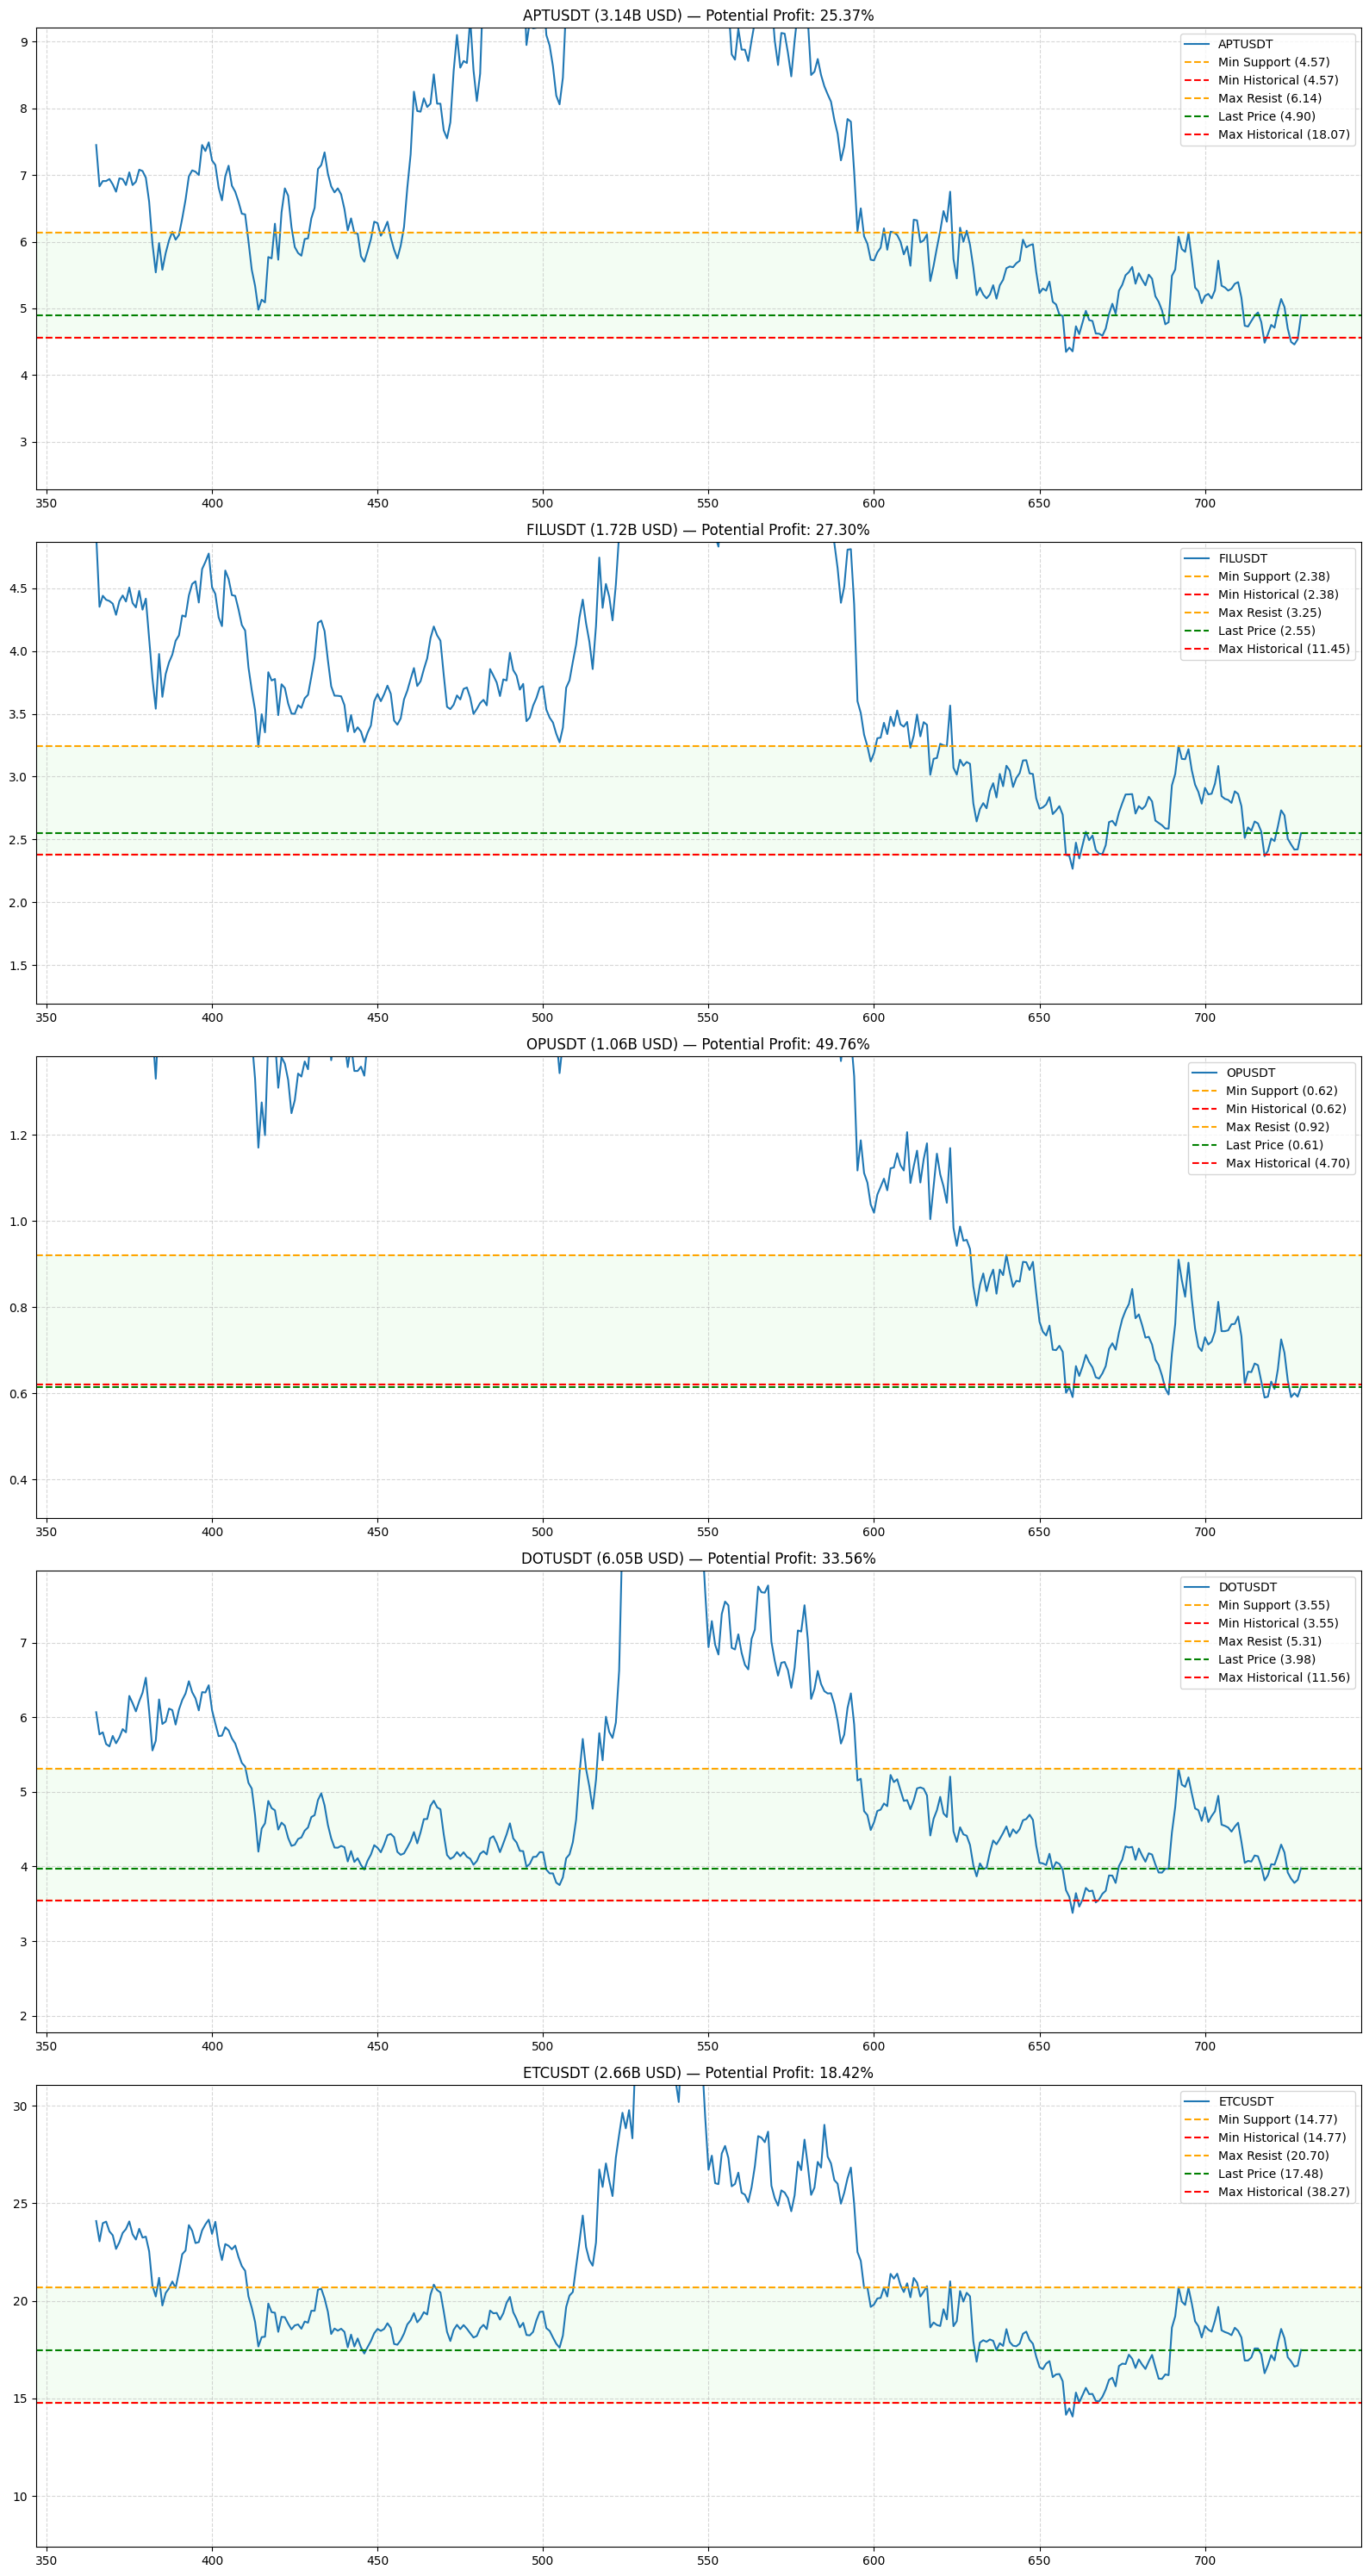

In [15]:
paint_result(df, result, optimal_symbol, cap_df, last_days=365)

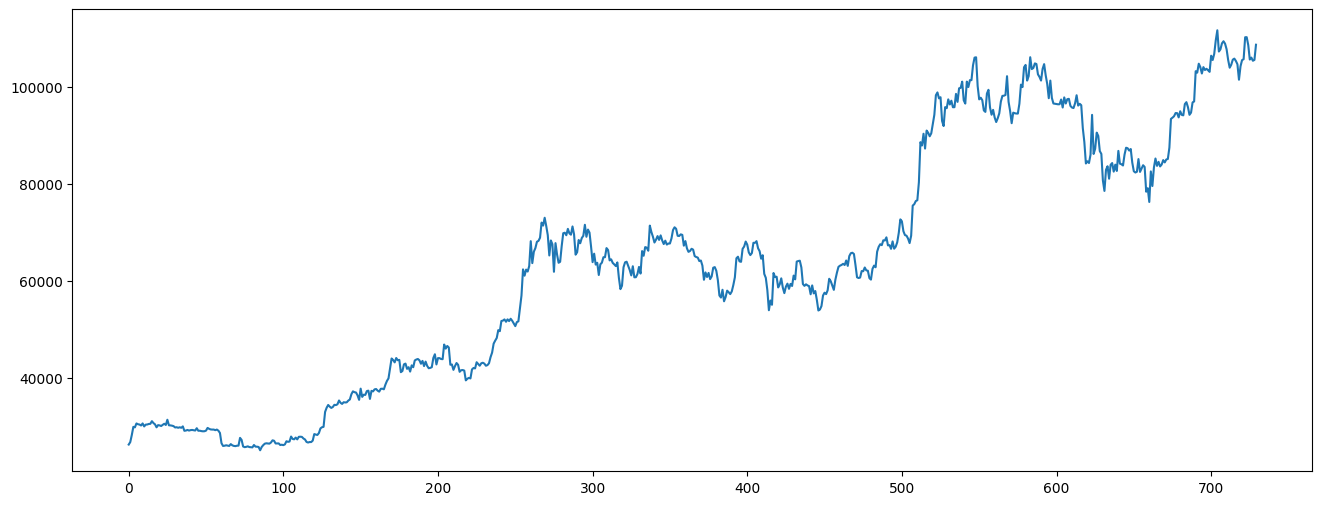

In [13]:
plt.figure(figsize=(16, 6))
df['BTCUSDT'].plot()
plt.show()